# UHFLI

We use the `ziqc.UHFLI` instrument driver for the *UHFLI* Lock-In amplifier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qcodes as qc
import zhinst.qcodes as ziqc

uhfli = ziqc.UHFLI("uhf1", "dev2324", interface="1GbE", host="10.42.0.226")

Successfully connected to data server at 10.42.0.2268004 api version: 6
Successfully connected to device DEV2324 on interface 1GBE
Connected to: Zurich Instruments UHFLI (serial:dev2324, firmware:65939) in 1.49s


## Nodetree

Access the *UHFLI's* nodetree:

In [2]:
print([k for k in uhfli.submodules.keys()])
print([k for k in uhfli.parameters.keys()])

['awg', 'daq', 'sweeper', 'stats', 'oscs', 'demods', 'extrefs', 'triggers', 'status', 'dios', 'auxins', 'system', 'sigins', 'sigouts', 'mods', 'boxcars', 'outputpwas', 'inputpwas', 'aucarts', 'aupolars', 'pids', 'features', 'auxouts', 'cnts']
['IDN', 'clockbase']


The `Parameter` *sample* of the demodulators uses the `getSample(...)` method of the *ziPython* API to read the latest sample of the demodulator. 

In [3]:
uhfli.demods[0].sample()

(0.35024545059240686+0.0008896467610803594j)

> ⚠️ Note that this parameter only returns a *single* sample. There is no guarantee for any precise time-relation between consecutive samples. For proper (triggered) data acquisition of signals aligned to a precise time-grid, please use the *Data Acquisition Module* (see below).

## The *Data Acquisition Module* of the *UHFLI*

Similarly to the *MFLI*, the *UHFLI* comes with a *Data Acquisition Module*. For more details, see the corresponding example about the *Data Acquisition Module*. 

In [4]:
print([k for k in uhfli.daq.parameters.keys()])

['awgcontrol', 'bandwidth', 'bitmask', 'bits', 'buffercount', 'buffersize', 'clearhistory', 'count', 'delay', 'device', 'duration', 'edge', 'enable', 'endless', 'eventcount_mode', 'fft_absolute', 'fft_window', 'findlevel', 'flags', 'forcetrigger', 'grid_cols', 'grid_direction', 'grid_mode', 'grid_overwrite', 'grid_repetitions', 'grid_rowrepetition', 'grid_rows', 'grid_waterfall', 'historylength', 'holdoff_count', 'holdoff_time', 'hysteresis', 'level', 'preview', 'pulse_max', 'pulse_min', 'refreshrate', 'save_csvlocale', 'save_csvseparator', 'save_directory', 'save_fileformat', 'save_filename', 'save_save', 'save_saveonread', 'spectrum_autobandwidth', 'spectrum_enable', 'spectrum_frequencyspan', 'spectrum_overlapped', 'triggered', 'triggernode', 'type']


The method `signals_list()` shows the available sources of streaming signals. Note that they differ with the installed options of the *UHFLI*.

In [5]:
uhfli.daq.signals_list()

['dio0',
 'auxin0',
 'scope0',
 'boxcar0',
 'boxcar1',
 'outputpwa0',
 'outputpwa1',
 'inputpwa0',
 'inputpwa1',
 'aucart0',
 'aucart1',
 'aupolar0',
 'aupolar1',
 'cnt0',
 'cnt1',
 'cnt2',
 'cnt3',
 'demod0',
 'demod1',
 'demod2',
 'demod3',
 'demod4',
 'demod5',
 'demod6',
 'demod7',
 'pid0_value',
 'pid0_error',
 'pid0_shift',
 'pid1_value',
 'pid1_error',
 'pid1_shift',
 'pid2_value',
 'pid2_error',
 'pid2_shift',
 'pid3_value',
 'pid3_error',
 'pid3_shift']

Use the method `signals_add(..)` to specify which signals should be acquired during a measurement. The return value gives the exact node path that will be subscribed to before the measurement.

In [6]:
demod_x = uhfli.daq.signals_add("demod0", "x")
demod_y = uhfli.daq.signals_add("demod0", "y")

# which signal nodes have been added?
print(uhfli.daq.signals)

['/dev2324/demods/0/sample.x.avg', '/dev2324/demods/0/sample.y.avg']


Use *trigger type*, *grid columns*, *grid rows* and other parameters to configure the measurement you want.

In [7]:
uhfli.daq.type("continuous")
uhfli.daq.grid_cols(100)
uhfli.daq.grid_rows(100)

The measurement routine is started using the `measure(...)` method. At first, the mdoule will subscribe to the signal nodes that were previously added to the measurement. Then the measurement is started. When it is finished, the results will be added to the `results` property of the `daq` Module. 

In [8]:
uhfli.daq.measure()

subscribed to: /dev2324/demods/0/sample.x.avg
subscribed to: /dev2324/demods/0/sample.y.avg
Progress: 0.0%
Progress: 5.0%
Progress: 12.0%
Progress: 19.0%
Progress: 30.0%
Progress: 37.0%
Progress: 48.0%
Progress: 55.0%
Progress: 62.0%
Progress: 73.0%
Progress: 80.0%
Progress: 91.0%
Progress: 98.0%
Finished


The results property is a dictionary with the exact signal node as its keys. The return value from `signals_add(..)` can be used to access the result of that signal. The value in the dictionary is a `DAQResult` object that contains all measurement information such as the measurement values, the time- or frequency-axis as well as meta-information.

In [9]:
uhfli.daq.results[demod_x]


path:        /dev2324/demods/0/sample.x.avg
value:       (100, 100)
time:        (100,)

In [10]:
uhfli.daq.results[demod_y]


path:        /dev2324/demods/0/sample.y.avg
value:       (100, 100)
time:        (100,)

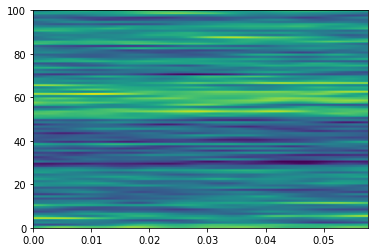

In [11]:
import matplotlib.pyplot as plt

result_x = uhfli.daq.results[demod_x]

plt.imshow(result_x.value, extent=[result_x.time[0], result_x.time[-1], 0, 100], aspect="auto")
plt.show()

## The *Sweeper Module* of the *UHFLI* 

The *UHFLI* also feeatures a *Sweeper Module* with all of the following *Parameters*:

In [12]:
print([k for k in uhfli.sweeper.parameters.keys()])

['averaging_sample', 'averaging_tc', 'averaging_time', 'awgcontrol', 'bandwidth', 'bandwidthcontrol', 'bandwidthoverlap', 'clearhistory', 'device', 'endless', 'gridnode', 'historylength', 'loopcount', 'maxbandwidth', 'omegasuppression', 'order', 'phaseunwrap', 'remainingtime', 'samplecount', 'save_csvlocale', 'save_csvseparator', 'save_directory', 'save_fileformat', 'save_filename', 'save_save', 'save_saveonread', 'scan', 'settling_inaccuracy', 'settling_tc', 'settling_time', 'sincfilter', 'start', 'stop', 'xmapping']


As for the *Data Acquisition Module* the available signal sources can be shown with `signals_list(...)`. They can differ depending on the options installed in the instrument.

In [13]:
uhfli.sweeper.signals_list()

['dio0',
 'auxin0',
 'scope0',
 'boxcar0',
 'boxcar1',
 'outputpwa0',
 'outputpwa1',
 'inputpwa0',
 'inputpwa1',
 'aucart0',
 'aucart1',
 'aupolar0',
 'aupolar1',
 'cnt0',
 'cnt1',
 'cnt2',
 'cnt3',
 'demod0',
 'demod1',
 'demod2',
 'demod3',
 'demod4',
 'demod5',
 'demod6',
 'demod7',
 'pid0_value',
 'pid0_error',
 'pid0_shift',
 'pid1_value',
 'pid1_error',
 'pid1_shift',
 'pid2_value',
 'pid2_error',
 'pid2_shift',
 'pid3_value',
 'pid3_error',
 'pid3_shift']

The *Parameters* that are available for sweeping can be listed with `sweep_parameter_list()`.

In [14]:
uhfli.sweeper.sweep_parameter_list()

['auxout0_offset',
 'auxout1_offset',
 'auxout2_offset',
 'auxout3_offset',
 'awg_amplitude0',
 'awg_amplitude1',
 'awg_trigger0',
 'awg_trigger1',
 'awg_trigger2',
 'awg_trigger3',
 'awg_triggerlevel0',
 'awg_triggerlevel1',
 'awg_userreg0',
 'awg_userreg1',
 'awg_userreg2',
 'awg_userreg3',
 'awg_userreg4',
 'awg_userreg5',
 'awg_userreg6',
 'awg_userreg7',
 'awg_userreg8',
 'awg_userreg9',
 'awg_userreg10',
 'awg_userreg11',
 'awg_userreg12',
 'awg_userreg13',
 'awg_userreg14',
 'awg_userreg15',
 'boxcar0_windowsize',
 'boxcar0_windowstart',
 'boxcar1_windowsize',
 'boxcar1_windowstart',
 'mod0_carrieramp',
 'mod0_index',
 'mod0_sideband0amp',
 'mod0_sideband1amp',
 'mod1_carrieramp',
 'mod1_index',
 'mod1_sideband0amp',
 'mod1_sideband1amp',
 'demdod0_phase',
 'demdod1_phase',
 'demdod2_phase',
 'demdod3_phase',
 'demdod4_phase',
 'demdod5_phase',
 'demdod6_phase',
 'demdod7_phase',
 'frequency0',
 'frequency1',
 'frequency2',
 'frequency3',
 'frequency4',
 'frequency5',
 'frequenc

A typical frequency sweep of the first oscillator frequency (*'frequency0'*) from 1-10 kHz and 100 steps is configured as follows. We add the signal from the first demodulator (*'demod0'*) to the measurement. 

In [15]:
# turn singal output on
uhfli.sigouts[0].on(1)

# prepare a frequency sweep
uhfli.sweeper.start(1e3)
uhfli.sweeper.stop(10e3)
uhfli.sweeper.samplecount(100)
uhfli.sweeper.sweep_parameter("frequency0")

# add a singal source
demod = uhfli.sweeper.signals_add("demod0")

set sweep parameter to 'frequency0': 'oscs/0/freq'


In [16]:
uhfli.sweeper.signals

['/dev2324/demods/0/sample']

The measurement is simply started with the `measure()` method:

In [17]:
# perform measurement
uhfli.sweeper.measure()

subscribed to: /dev2324/demods/0/sample
Sweeping oscs/0/freq from 1000.0 to 10000.0
Progress: 0.0%
Progress: 7.0%
Progress: 14.0%
Progress: 22.0%
Progress: 29.0%
Progress: 36.0%
Progress: 43.0%
Progress: 51.0%
Progress: 59.0%
Progress: 66.0%
Progress: 74.0%
Progress: 82.0%
Progress: 90.0%
Progress: 98.0%
Finished


The results are stored in the `results` dictionary with the exact node path as the key. The value is a `DAQResults` object from the `zhinst-toolkit`. It contains all the data of the demodulator that has been returned by the Python API. 

In [18]:
result = uhfli.sweeper.results[demod]

In [19]:
result


attributes:
 - header
 - timestamp
 - samplecount
 - flags
 - sampleformat
 - sweepmode
 - bandwidthmode
 - auxin0
 - auxin0pwr
 - auxin0stddev
 - auxin1
 - auxin1pwr
 - auxin1stddev
 - bandwidth
 - frequency
 - frequencypwr
 - frequencystddev
 - grid
 - phase
 - phasepwr
 - phasestddev
 - r
 - rpwr
 - rstddev
 - settling
 - tc
 - tcmeas
 - x
 - xpwr
 - xstddev
 - y
 - ypwr
 - ystddev
 - count
 - nexttimestamp
 - settimestamp

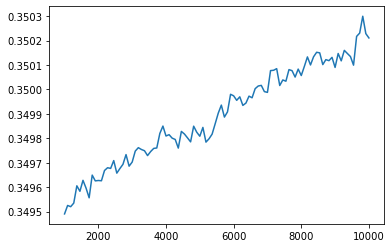

In [20]:
import matplotlib.pyplot as plt

plt.plot(result.frequency, result.x)
plt.show()